Example of Euler's method
---
<div>
<img src="attachment:826e6c5c-75f1-499a-8a49-e7c4147a522b.png" width="300"/>
</div>

This example supersedes the starter code described in the README.md file 

In [64]:
vinit = 10 # m/s
theta0 = 45 # degrees
dt = 0.0001 # seconds

In [65]:
print("Simulating projectile motion with params:")
print("(vinit,theta0,dt)=(%7.2lf,%7.2f,%7.2f)" % (vinit,theta0,dt))

Simulating projectile motion with params:
(vinit,theta0,dt)=(  10.00,  45.00,   0.00)


In [66]:
from matplotlib import pyplot as plt
from math import sin,cos,pi
import numpy as np

In [67]:
# initial coordinate values: position and velocity 
#  x y          vx                         vy
y0=[0.,0.,vinit*cos(theta0*pi/180),vinit*sin(theta0*pi/180)]
# acceleration due to gravity
g=9.81  # m/s^2

In [68]:
# analytic range
xfinal = y0[2]*2*y0[3]/g
print("final range:", xfinal)

final range: 10.19367991845056


In [69]:
# the functions = derivatives of the coortinates wrt t
def f0(t,y):
    return y[2]  # v_x
def f1(t,y):
    return y[3]  # v_y
def f2(t,y):
    return 0     # acceleration in x
def f3(t,y):
    return -g    # acceleration in y

In [70]:
t=[0]   # keep track of steps in time
y=y0[:] # copy the starting coordinates
trajectory=np.asarray([y0]) # store trajectory

In [71]:
# propagate our projectile
while y[1]>=0:
    y[0]= y[0]+f0(t[-1],y)*dt
    y[1]= y[1]+f1(t[-1],y)*dt
    y[2]= y[2]+f2(t[-1],y)*dt
    y[3]= y[3]+f3(t[-1],y)*dt
    t.append(t[-1]+dt)
    trajectory=np.append(trajectory,[y],axis=0)

In [72]:
# get trajectories for each coordinate
sx = trajectory[:,0] 
sy = trajectory[:,1]
vx = trajectory[:,2]
vy = trajectory[:,3]

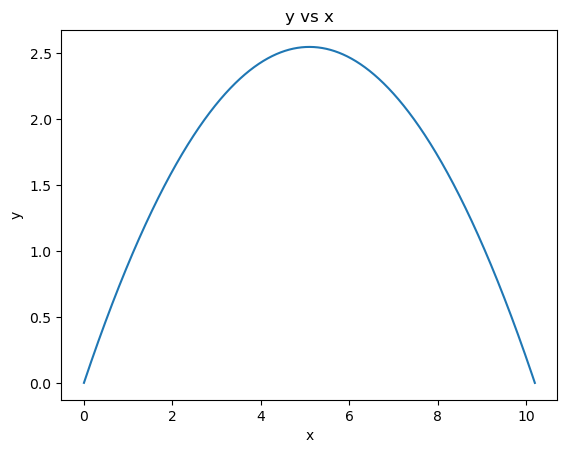

In [73]:
plt.plot(sx, sy)
plt.title("y vs x"),plt.xlabel("x"),plt.ylabel("y");

Study and assess the performance of the Euler algorithm, you can do this in a variety of ways, for example:

* Observe the calculated landing location versus the time step (similarly the error wrt the analytic solution).
* Can you find a time step where the landing location is a “pretty good” match to the expected position?
* Is this observation stable with changes to the initial conditions?
* Plot the difference in x and y position (or velocity) versus time compared to the analytic solution
* Plot the energy of the projectile versus time
* …


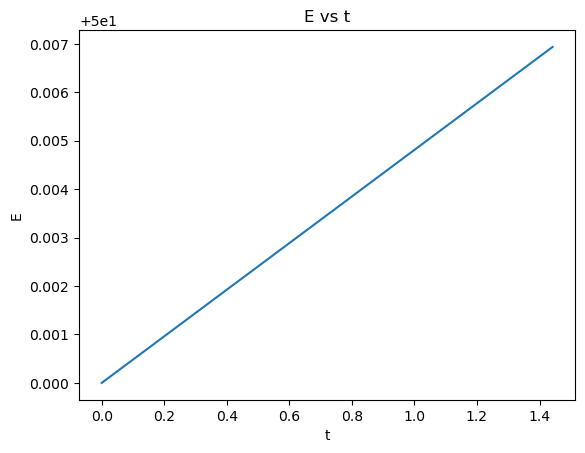

In [74]:
E = [0.5*1*(vx[i]**2 + vy[i]**2) + 1*g*sy[i] for i in range(len(vx))]
plt.plot(t, E)
plt.title("E vs t"),plt.xlabel("t"),plt.ylabel("E");

In [75]:
print(f"Difference in final position:", xfinal-sx[-1])

Difference in final position: -0.0013856526987545692


Reducing timestep reduces error in final position!